# LearnPlatform COVID-19 Impact on Digital Learning

Nelson Mandela believed education was the most powerful weapon to change the world. But not every student has equal opportunities to learn. Effective policies and plans need to be enacted in order to make education more equitable—and perhaps your innovative data analysis will help reveal the solution.

Current research shows educational outcomes are far from equitable. The imbalance was exacerbated by the COVID-19 pandemic. There's an urgent need to better understand and measure the scope and impact of the pandemic on these inequities.

Education technology company LearnPlatform was founded in 2014 with a mission to expand equitable access to education technology for all students and teachers. LearnPlatform’s comprehensive edtech effectiveness system is used by districts and states to continuously improve the safety, equity, and effectiveness of their educational technology. LearnPlatform does so by generating an evidence basis for what’s working and enacting it to benefit students, teachers, and budgets.

In this analytics competition, you’ll work to uncover trends in digital learning. Accomplish this with data analysis about how engagement with digital learning relates to factors like district demographics, broadband access, and state/national level policies and events. Then, submit a Kaggle Notebook to propose your best solution to these educational inequities.

Your submissions will inform policies and practices that close the digital divide. With a better understanding of digital learning trends, you may help reverse the long-term learning loss among America’s most vulnerable, making education more equitable.

## Problem Statement

The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

## Challenge

We challenge the Kaggle community to explore (1) the state of digital learning in 2020 and (2) how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

We encourage you to guide the analysis with questions that are related to the themes that are described above (in bold font). Below are some examples of questions that relate to our problem statement:

What is the picture of digital connectivity and engagement in 2020?
What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
How does student engagement with different types of education technology change over the course of the pandemic?
How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?

## Data Fetching

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# print(dirname,filenames)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

## Importing Libraries

In [2]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import wandb
import math

import folium
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
#Dont Run!
df = pd.DataFrame()  

import random
random.seed(0)
for file in random.sample(filenames, 20):
    if df.empty:
        df = pd.read_csv(os.path.join(dirname, file))
    else:
        d = pd.read_csv(os.path.join(dirname, file))
        df = pd.concat([df, d])
df

,time,lp_id,pct_access,engagement_index
0,2020-02-21,77832.0,3.66,114.77
1,2020-02-21,32340.0,0.20,24.14
2,2020-02-21,85975.0,0.72,109.72
3,2020-02-21,43494.0,0.00,NaN
4,2020-02-21,83248.0,0.02,0.88
...,...,...,...,...
121973,2020-12-31,75783.0,0.02,1.56
121974,2020-12-31,29322.0,1.23,532.46
121975,2020-12-31,28504.0,0.60,188.73
121976,2020-12-31,85682.0,0.00,NaN


## Reading Data

In [4]:
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
files = glob.glob(path + "/*.csv")

csv_list = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[4].split(".")[0]
    df["district_id"] = district_id
    csv_list.append(df)
    
engagement_data = pd.concat(csv_list)
engagement_data = engagement_data.reset_index(drop=True)
engagement_data.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345


In [5]:
engagement_data = engagement_data.rename(columns = {'lp_id':'LP ID'})

In [6]:
district_data = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
district_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
district_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [8]:
district_data = district_data[district_data.isnull().sum(axis=1)<5]
district_data

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [9]:
district_data.isnull().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

In [10]:
district_data.dtypes

district_id                  int64
state                       object
locale                      object
pct_black/hispanic          object
pct_free/reduced            object
county_connections_ratio    object
pp_total_raw                object
dtype: object

In [11]:
product_data = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
product_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [12]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [13]:
product_data.isnull().sum()/len(product_data.index)

LP ID                         0.000000
URL                           0.000000
Product Name                  0.000000
Provider/Company Name         0.002688
Sector(s)                     0.053763
Primary Essential Function    0.053763
dtype: float64

In [14]:
df_merge = pd.merge(engagement_data, product_data, how='inner', on='LP ID')
df_merge['district_id'] = df_merge['district_id'].astype('int')
df_master = pd.merge(df_merge, district_data, how='inner', on='district_id')
df_master.head()

,time,LP ID,pct_access,engagement_index,district_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,92844.0,0.01,0.68,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Massachusetts,Suburb,"[0.2, 0.4[",NaN,"[0.18, 1[","[12000, 14000["
1,2020-01-02,92844.0,0.09,6.58,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Massachusetts,Suburb,"[0.2, 0.4[",NaN,"[0.18, 1[","[12000, 14000["
2,2020-01-03,92844.0,0.06,3.63,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Massachusetts,Suburb,"[0.2, 0.4[",NaN,"[0.18, 1[","[12000, 14000["
3,2020-01-06,92844.0,0.22,9.87,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Massachusetts,Suburb,"[0.2, 0.4[",NaN,"[0.18, 1[","[12000, 14000["
4,2020-01-07,92844.0,0.16,15.08,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Massachusetts,Suburb,"[0.2, 0.4[",NaN,"[0.18, 1[","[12000, 14000["


In [15]:

round(df_master.isnull().sum()/len(df_master.index),2)

time                          0.00
LP ID                         0.00
pct_access                    0.00
engagement_index              0.20
district_id                   0.00
URL                           0.00
Product Name                  0.00
Provider/Company Name         0.00
Sector(s)                     0.04
Primary Essential Function    0.04
state                         0.00
locale                        0.00
pct_black/hispanic            0.00
pct_free/reduced              0.15
county_connections_ratio      0.08
pp_total_raw                  0.32
dtype: float64

In [16]:
df_master.dropna(axis=0,inplace=True)

In [17]:
# Taking copy of cleaned data
df_master_clean = df_master[:]

## Data formating

In [18]:
print('before:' ,df_master_clean['pct_black/hispanic'].unique())
def clean_x(x):
    x1= x.split(',')[1][:4].strip()
    if x1 == '1[':
        x1 = x1[:1]
    return float(x1)
    
df_master_clean['pct_black/hispanic'] = df_master_clean['pct_black/hispanic'].apply(clean_x)
print('after:' ,df_master_clean['pct_black/hispanic'].unique())

print('before:' ,df_master_clean['pct_free/reduced'].unique())
df_master_clean['pct_free/reduced'] = df_master_clean['pct_free/reduced'].apply(clean_x)
print('after:' ,df_master_clean['pct_free/reduced'].unique())

before: ['[0, 0.2[' '[0.2, 0.4[' '[0.4, 0.6[' '[0.8, 1[' '[0.6, 0.8[']
after: [0.2 0.4 0.6 1.  0.8]
before: ['[0.2, 0.4[' '[0, 0.2[' '[0.6, 0.8[' '[0.8, 1[' '[0.4, 0.6[']
after: [0.4 0.2 0.8 1.  0.6]


In [19]:
df_master_clean.drop(['county_connections_ratio','URL'],axis=1,inplace=True)

In [20]:
print('before:' ,df_master_clean['pp_total_raw'].unique())
df_master_clean['pp_total_raw'] = df_master_clean['pp_total_raw'].apply(lambda x: int(x[1:-1].split(',')[1].strip()))
print('after:' ,df_master_clean['pp_total_raw'].unique())

before: ['[6000, 8000[' '[12000, 14000[' '[8000, 10000[' '[10000, 12000['
 '[14000, 16000[' '[4000, 6000[' '[16000, 18000[' '[18000, 20000['
 '[32000, 34000[' '[22000, 24000[']
after: [ 8000 14000 10000 12000 16000  6000 18000 20000 34000 24000]


In [21]:
df_master_clean['pp_total_raw'] = df_master_clean['pp_total_raw'].astype('int')

In [22]:
df_master_clean.head()

,time,LP ID,pct_access,engagement_index,district_id,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
57732,2020-01-02,92844.0,0.01,0.13,9812,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Utah,Suburb,0.2,0.4,8000
57733,2020-01-03,92844.0,0.01,0.21,9812,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Utah,Suburb,0.2,0.4,8000
57734,2020-01-05,92844.0,0.01,0.08,9812,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Utah,Suburb,0.2,0.4,8000
57735,2020-01-06,92844.0,0.02,0.21,9812,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Utah,Suburb,0.2,0.4,8000
57736,2020-01-07,92844.0,0.01,0.13,9812,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,Utah,Suburb,0.2,0.4,8000


In [23]:
round(df_master_clean.isnull().sum()/len(df_master_clean.index),2)

time                          0.0
LP ID                         0.0
pct_access                    0.0
engagement_index              0.0
district_id                   0.0
Product Name                  0.0
Provider/Company Name         0.0
Sector(s)                     0.0
Primary Essential Function    0.0
state                         0.0
locale                        0.0
pct_black/hispanic            0.0
pct_free/reduced              0.0
pp_total_raw                  0.0
dtype: float64

In [24]:
df_master_clean['time'] = pd.to_datetime(df_master_clean['time'], format='%Y-%m-%d')
df_master_clean['month'] = df_master_clean['time'].apply(lambda x: x.month)
df_master_clean['month'] = df_master_clean['month'].astype('category')
df_master_clean['month'] = df_master_clean['month'].cat.rename_categories(['Jan','Feb','Mar','Apr','May',
                                                'Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Data Analysing

In [25]:
df_master_clean.loc[:, ['LP ID', 'Product Name','district_id','Provider/Company Name']].value_counts()

LP ID    Product Name  district_id  Provider/Company Name
99916.0  Google Drive  9899         Google LLC               366
64948.0  Prodigy       2779         SMARTeacher Inc.         366
                       2393         SMARTeacher Inc.         366
64947.0  Desmos        8784         Desmos                   366
64838.0  Starfall      6919         Starfall Education       366
                                                            ... 
21917.0  Google Voice  4373         Google LLC                 1
12803.0  SlideShare    5600         LinkedIn                   1
95767.0  Hapara        5987         Hapara                     1
21917.0  Google Voice  4683         Google LLC                 1
91873.0  Breakout EDU  5600         Breakout, Inc              1
Length: 28085, dtype: int64

## Demographic vs Engagement Analysis

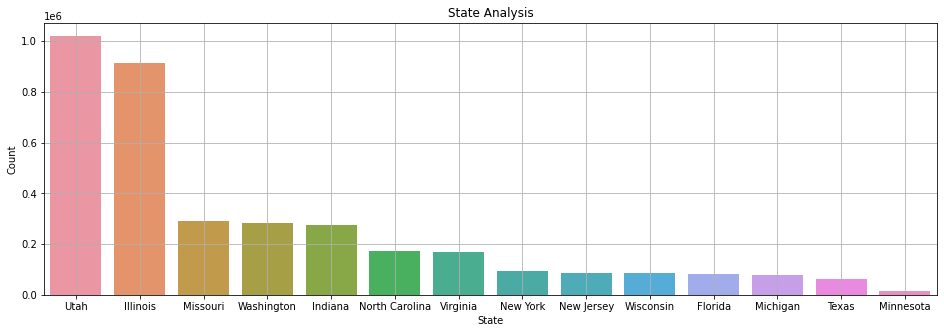

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
index,Utah,Illinois,Missouri,Washington,Indiana,North Carolina,Virginia,New York,New Jersey,Wisconsin,Florida,Michigan,Texas,Minnesota
state,1020841,914808,292821,285007,274085,172201,169133,92569,86720,84553,80858,78600,63725,13103


In [26]:
state_df = df_master_clean['state'].value_counts()
state_df = state_df.to_frame()
state_df.reset_index(level=0,inplace=True)
plt.figure(figsize=(16,5))
ax = sns.barplot(y='state', x='index', data=state_df)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Analysis')
ax.grid(True)


plt.show()
state_df.T

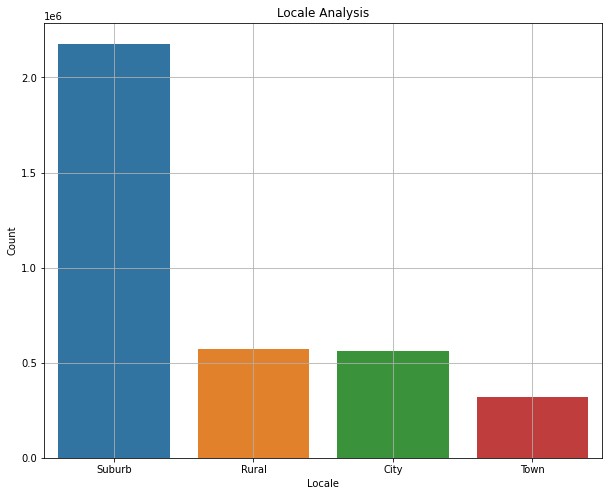

,index,locale
0,Suburb,2177850
1,Rural,569848
2,City,561041
3,Town,320285


In [27]:
locale_df = df_master_clean['locale'].value_counts()
locale_df = locale_df.to_frame()
locale_df.reset_index(level=0,inplace=True)
plt.figure(figsize=(10,8))
ax = sns.barplot(y='locale', x='index', data=locale_df)
plt.xlabel('Locale')
plt.ylabel('Count')
plt.title('Locale Analysis')
ax.grid(True)
plt.show()
locale_df

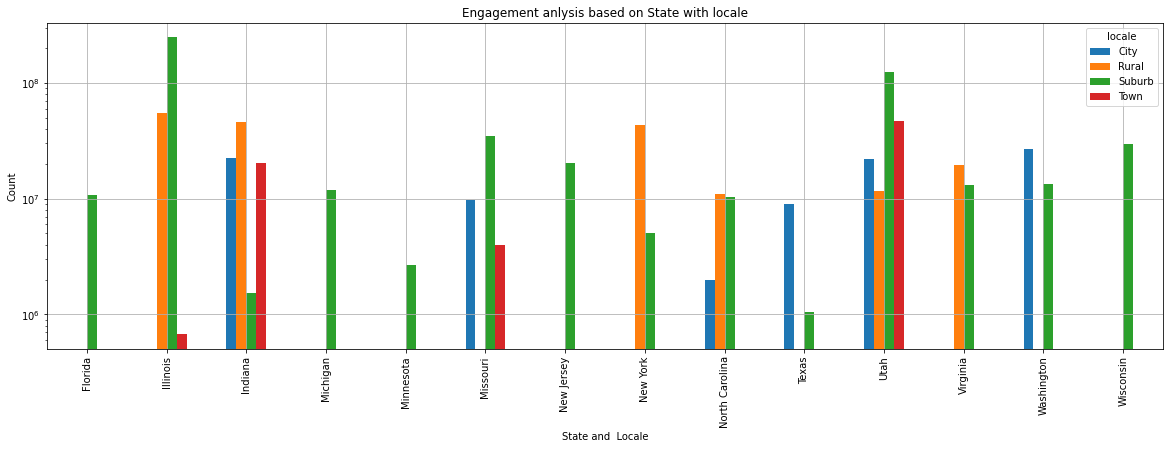

state,Florida,Illinois,Indiana,Michigan,Minnesota,Missouri,New Jersey,New York,North Carolina,Texas,Utah,Virginia,Washington,Wisconsin
locale,,,,,,,,,,,,,,
City,NaN,NaN,2.262898e+07,NaN,NaN,9.742050e+06,NaN,NaN,1.993546e+06,9067107.88,2.198581e+07,NaN,2.701909e+07,NaN
Rural,NaN,5.522310e+07,4.602325e+07,NaN,NaN,NaN,NaN,4.339792e+07,1.089874e+07,NaN,1.162981e+07,1.963149e+07,NaN,NaN
Suburb,1.085396e+07,2.473355e+08,1.531698e+06,11923068.03,2697167.11,3.494273e+07,2.014256e+07,5.044404e+06,1.027674e+07,1040697.16,1.234212e+08,1.315972e+07,1.344973e+07,2.986551e+07
Town,NaN,6.793072e+05,2.019377e+07,NaN,NaN,4.003796e+06,NaN,NaN,NaN,NaN,4.720618e+07,NaN,NaN,NaN


In [28]:
d1 = df_master_clean.pivot_table(values='engagement_index',
                                            index='state',
                                            columns='locale',
                                            aggfunc='sum')

ax = d1.plot.bar(figsize=(20, 6),logy=True).grid(True)
plt.ylabel('Count')
plt.xlabel('State and  Locale')
plt.title("Engagement anlysis based on State with locale")
plt.show()
d1.T

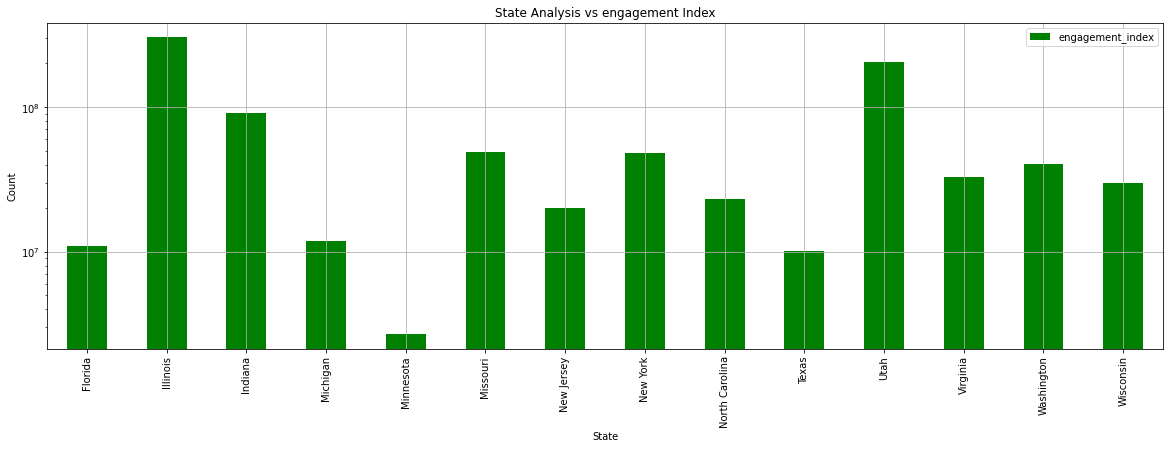

state,Florida,Illinois,Indiana,Michigan,Minnesota,Missouri,New Jersey,New York,North Carolina,Texas,Utah,Virginia,Washington,Wisconsin
engagement_index,1.085396e+07,3.032379e+08,9.037769e+07,11923068.03,2697167.11,4.868858e+07,2.014256e+07,4.844233e+07,2.316902e+07,1.010781e+07,2.042430e+08,3.279120e+07,4.046882e+07,2.986551e+07


In [29]:
d0 = df_master_clean.pivot_table(values='engagement_index',
                                            index='state',
                                            aggfunc='sum')

ax = d0.plot.bar(figsize=(20, 6),logy=True, color='g').grid(True)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Analysis vs engagement Index')
plt.show()
d0.T

### Observation:

* Students of Utah , Illinois have highly enganged in digiital learning
* Students of suburb have highly enganged in digiital learning

## Month vs Engagement Analysis

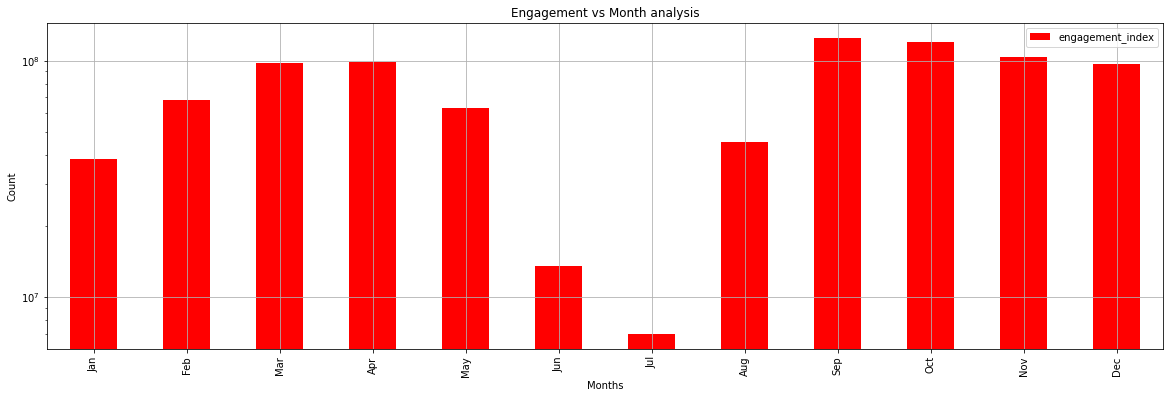

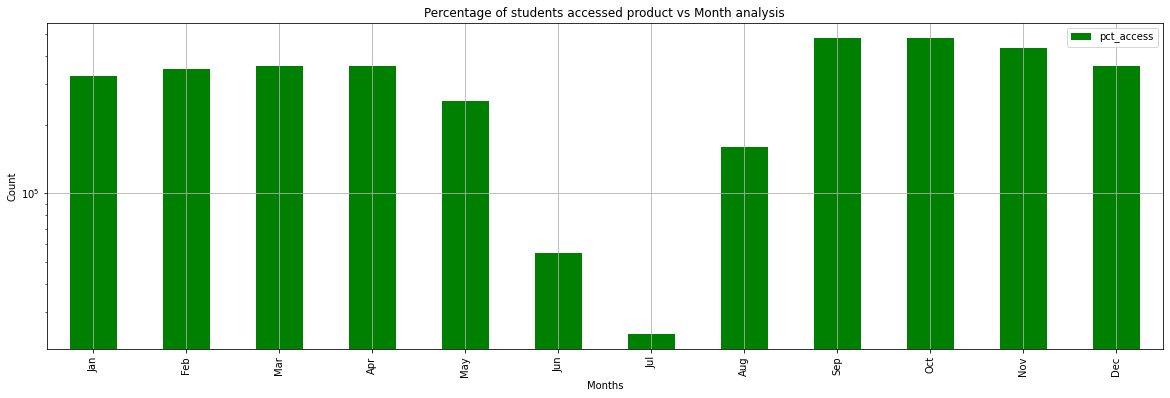

In [30]:
m1 = df_master_clean.pivot_table(values='engagement_index',
                                            index='month',
                                            aggfunc='sum')
ax = m1.plot.bar(figsize=(20, 6),logy=True, color='r').grid(True)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Engagement vs Month analysis")
plt.show()
# m1.T

m2 = df_master_clean.pivot_table(values='pct_access',
                                            index='month',
                                            aggfunc='sum')
ax = m2.plot.bar(figsize=(20, 6),logy=True, color='g').grid(True)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Percentage of students accessed product vs Month analysis")
plt.show()
# m1.T

## Product vs Engagement Analysis

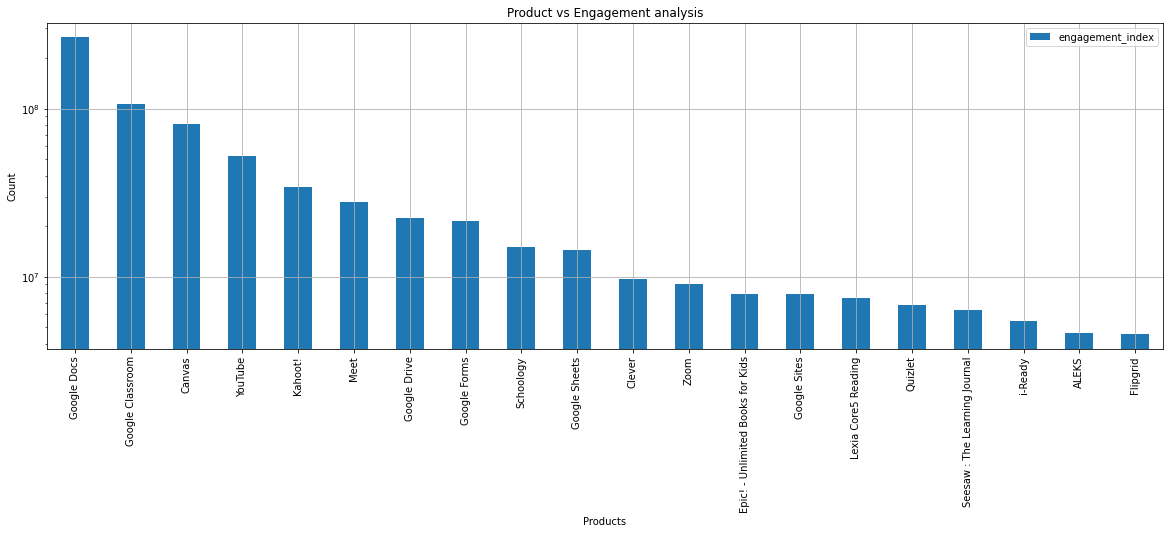

Product Name,Google Docs,Google Classroom,Canvas,YouTube,Kahoot!,Meet,Google Drive,Google Forms,Schoology,Google Sheets,Clever,Zoom,Epic! - Unlimited Books for Kids,Google Sites,Lexia Core5 Reading,Quizlet,Seesaw : The Learning Journal,i-Ready,ALEKS,Flipgrid
engagement_index,2.655783e+08,1.070313e+08,80826714.35,52105992.3,34165783.84,27784329.0,22218465.14,21452575.92,15017997.41,14382768.26,9731008.35,9036018.6,7848193.03,7846464.19,7497116.89,6824392.89,6371012.99,5477359.69,4622824.74,4570794.64


In [31]:
d2 = df_master_clean.pivot_table(values='engagement_index',
                                            index='Product Name',
                                            aggfunc='sum')
d2_sorted = d2.sort_values(by='engagement_index',ascending=False).head(20)

ax = d2_sorted.plot.bar(figsize=(20, 6),logy=True).grid(True)
plt.xlabel('Products')
plt.ylabel('Count')
plt.title("Product vs Engagement analysis")
plt.show()
d2_sorted.T

## Provider Analysis

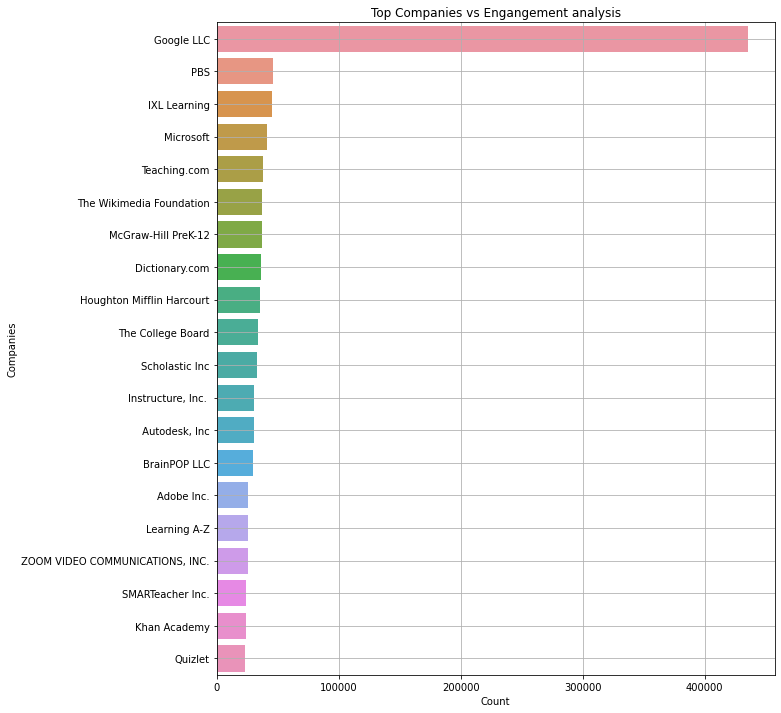

In [32]:
comp_name_df = df_master_clean['Provider/Company Name'].value_counts()
comp_name_df = comp_name_df.to_frame()
comp_name_df.reset_index(level=0,inplace=True)
comp_name_df = comp_name_df.head(20)

plt.figure(figsize=(10,12))
ax = sns.barplot(x='Provider/Company Name', y='index', data=comp_name_df)
plt.xlabel('Count')
plt.ylabel('Companies')
plt.title('Top Companies vs Engangement analysis')
ax.grid(True)
plt.show()
# sector_df

### Sector Analysis

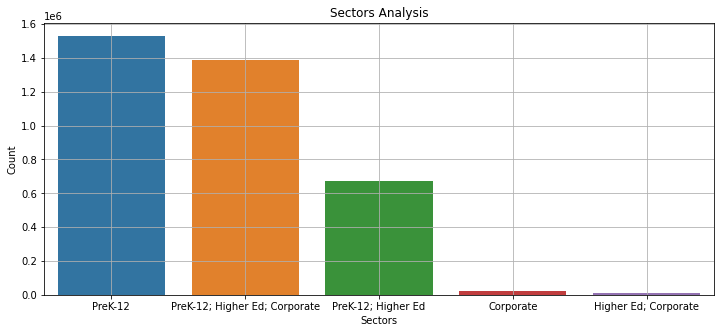

,0,1,2,3,4
index,PreK-12,PreK-12; Higher Ed; Corporate,PreK-12; Higher Ed,Corporate,Higher Ed; Corporate
Sector(s),1530548,1391195,675023,21921,10337


In [33]:
sector_df = df_master_clean['Sector(s)'].value_counts()
sector_df = sector_df.to_frame()
sector_df.reset_index(level=0,inplace=True)
plt.figure(figsize=(12,5))
ax = sns.barplot(y='Sector(s)', x='index', data=sector_df)
plt.ylabel('Count')
plt.xlabel('Sectors')
plt.title('Sectors Analysis')
ax.grid(True)
plt.show()
sector_df.T


## Primary Essential Function Analysis

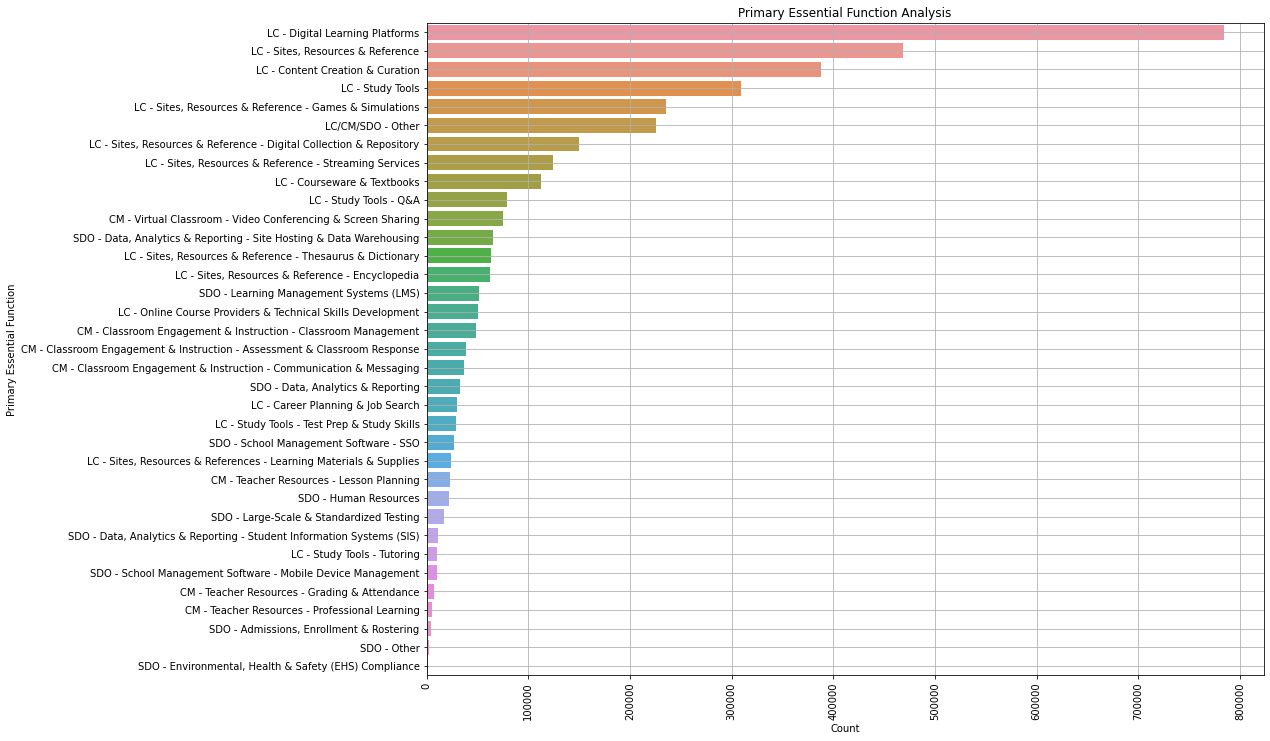

In [34]:
pef_df = df_master_clean['Primary Essential Function'].value_counts()
pef_df = pef_df.to_frame()
pef_df.reset_index(level=0,inplace=True)
# pef_df = pef_df.head(100)
plt.figure(figsize=(15,12))
ax = sns.barplot(x='Primary Essential Function', y='index', data=pef_df)
plt.xlabel('Count')
plt.ylabel('Primary Essential Function')
plt.title('Primary Essential Function Analysis')
plt.xticks(rotation=90)
# plt.rc('font', size=20)  
ax.grid(True)
plt.show()
# pef_df

In [35]:
df_master_clean['Primary Essential Function categories'] = df_master_clean['Primary Essential Function'].apply(lambda x: x.split('-')[0])
df_master_clean['Primary Essential Function categories'].value_counts()

LC            2922768
SDO            245718
CM             235102
LC/CM/SDO      225436
Name: Primary Essential Function categories, dtype: int64

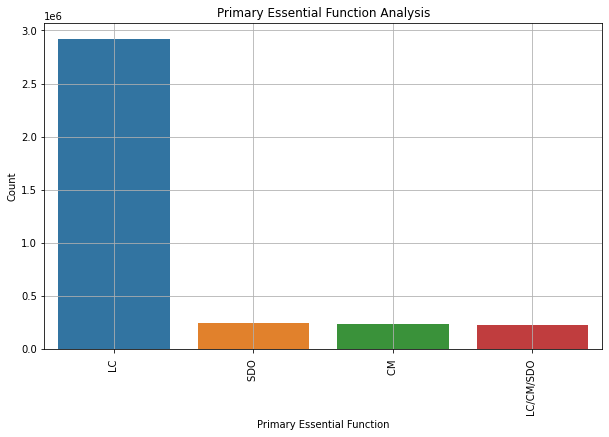

In [36]:
pef_df1 = df_master_clean['Primary Essential Function categories'].value_counts()
pef_df1 = pef_df1.to_frame()
pef_df1.reset_index(level=0,inplace=True)
# pef_df1 = pef_df.head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(y='Primary Essential Function categories', x='index', data=pef_df1)
plt.ylabel('Count')
plt.xlabel('Primary Essential Function')
plt.title('Primary Essential Function Analysis')
plt.xticks(rotation=90)
# plt.rc('font', size=20)  
ax.grid(True)
plt.show()

Highest engagement in Learning and Curriculum(LC)

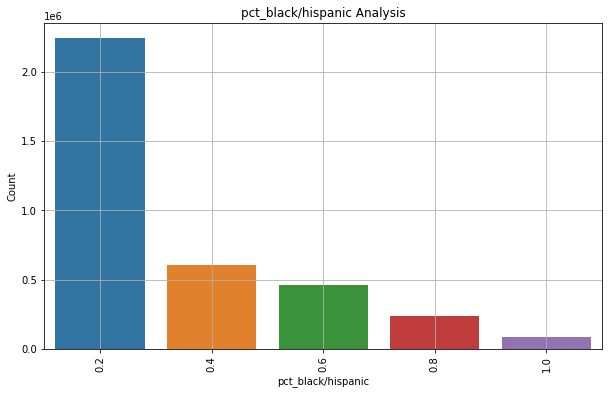

In [37]:
type_df = df_master_clean['pct_black/hispanic'].value_counts()
type_df = type_df.to_frame()
type_df.reset_index(level=0,inplace=True)
# pef_df1 = pef_df.head(10)
plt.figure(figsize=(10,6))
ax = sns.barplot(y='pct_black/hispanic', x='index', data=type_df)
plt.ylabel('Count')
plt.xlabel('pct_black/hispanic')
plt.title('pct_black/hispanic Analysis')
plt.xticks(rotation=90) 
ax.grid(True)
plt.show()

### Work in progress..

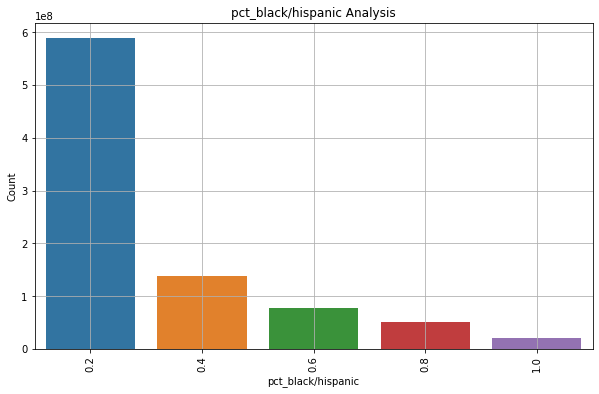

In [38]:
type_df1 = df_master_clean.pivot_table(values='engagement_index',
                                            index='pct_black/hispanic',
                                            aggfunc='sum')

type_df1.reset_index(level=0,inplace=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(y='engagement_index', x='pct_black/hispanic', data=type_df1)
plt.ylabel('Count')
plt.xlabel('pct_black/hispanic')
plt.title('pct_black/hispanic Analysis')
plt.xticks(rotation=90) 
ax.grid(True)
plt.show()

Work in progress